### Test où le tri se fait sur l'entrainement

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [175]:
list_score_sbert = [
    [0,0.5043409629044988],
    [1,0.49329123914759276],
    [2,0.5122336227308603],
    [3,0.4964483030781373],
    [4,0.5872138910812944],
    [5,0.5864246250986582],
    [6,0.4956590370955012],
    [7,0.6385161799526441],
    [8,0.5027624309392266],
    [9,0.6243093922651933]
]

(0.0, 1.0)

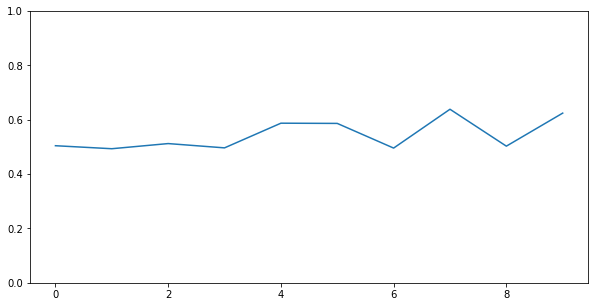

In [176]:
plt.plot(list(pd.DataFrame(list_score_sbert)[0]),
         list(pd.DataFrame(list_score_sbert)[1]))
plt.ylim([0,1])

(0.0, 1.0)

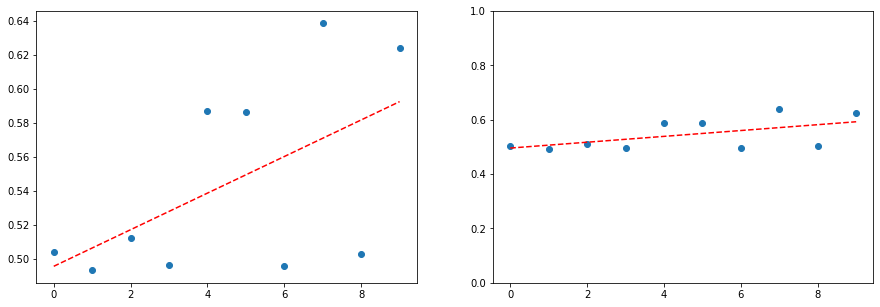

In [177]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(list(pd.DataFrame(list_score_sbert)[0]),
            list(pd.DataFrame(list_score_sbert)[1]))
z = np.polyfit(list(pd.DataFrame(list_score_sbert)[0]),
               list(pd.DataFrame(list_score_sbert)[1]),
               1)
p = np.poly1d(z)
plt.plot(list(pd.DataFrame(list_score_sbert)[0]),
         p(list(pd.DataFrame(list_score_sbert)[0])),"r--")
plt.subplot(1,2,2)
plt.scatter(list(pd.DataFrame(list_score_sbert)[0]),
            list(pd.DataFrame(list_score_sbert)[1]))
plt.plot(list(pd.DataFrame(list_score_sbert)[0]),
         p(list(pd.DataFrame(list_score_sbert)[0])),"r--")
plt.ylim([0,1])

Cadre de l'expérience :
- 10 différents training sets (*splitted_xl_sbert_0*,...,*splitted_xl_sbert_9*)
- Mesure :
    - similarité cosine appliquée aux vecteurs SBERT
    - on calcule la matrice donnant cette mesure pour l'ensemble des schemas du set xl avec le test set
    - on retient la moyenne du dernier décile pour chaque texte du set xl comme valeur de référence
- *splitted_xl_sbert_0* est le data set avec les valeurs de référence les plus élevées
- *splitted_xl_sbert_9* est le data set avec les valeurs de référence les moins élevées

Résultats de l'expérience:
- Valeurs très proches (environ 0.5)
- légère tendance à être plus performant lorsque le data set est plus "varié" (car observation de plus de cas différents)
- **A noter** : le résultat dépend fortement de la taille du data set d'entrainement $\rightarrow$ on comprend mieux ce résultat contre intuitif
- **A tester** : data set ordonné selon le max pour chaque schema du set xl (distribution plus étalée que pour la moy $10^{ème}$ décile, moy et med

In [178]:
xl : 0.77
l : 0.7
m : 0.55
s : 0.51

### Fonctions

In [179]:
def plot_results_max(column):

    df_sorted = list(df_labels.sort_values(column)[column])
    df_sorted_identical = list(df_labels.sort_values(column)['is_identical'])

    count = 0
    l = [0]
    for i in range(len(df_sorted)):
        #print(df_sorted_max_sbert[i])
        if count+0.1<=df_sorted[i]:
            count+=0.1
            l.append(i)
            #print('yes')
    list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]

    l11 = []
    for i in range(12):
        l11.append(np.mean(df_sorted[i*100:(i+1)*100]))
    l11 += [np.mean(df_sorted[1200:])]
    l21 = []
    for i in range(12):
        l21.append(np.mean(df_sorted_identical[i*100:(i+1)*100]))
    l21 += [np.mean(df_sorted_identical[1200:])]

    l12 = []
    for i in range(126):
        l12.append(np.mean(df_sorted[i*10:(i+1)*10]))
    l12 += [np.mean(df_sorted[1260:])]
    l22 = []
    for i in range(126):
        l22.append(np.mean(df_sorted_identical[i*10:(i+1)*10]))
    l22 += [np.mean(df_sorted_identical[1260:])]


    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.scatter([0.1 * i for i in range(len(list_scores_range))],list_scores_range)
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.subplot(2,2,2)
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.scatter([0.1 * i for i in range(len(list_scores_range))],list_scores_range)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.subplot(2,2,3)
    plt.scatter(l11,l21)
    plt.title('plot for 10 points',loc='right')
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.subplot(2,2,4)
    plt.title('plot for 100 points',loc='right')
    plt.xlabel(f'{column}')
    plt.ylabel('Accuracy for the given bracket')
    plt.scatter(l12,l22)
    plt.show()

### Preprocessing

In [180]:
matrice_sbert = pd.read_csv('scores_matrix/matrix_sbert.csv')
matrice_sbert = matrice_sbert.drop('Unnamed: 0',axis=1)
matrice_syntax_postag = pd.read_csv('scores_matrix/matrix_syntax_postag.csv')
matrice_syntax_postag = matrice_syntax_postag.drop('Unnamed: 0',axis=1)
matrice_syntax_tree = pd.read_csv('scores_matrix/matrix_syntax_tree.csv')
matrice_syntax_tree = matrice_syntax_tree.drop('Unnamed: 0',axis=1)

In [181]:
matrice_sbert

,0,1,2,3,4,5,6,7,8,9,...,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266
0,0.316807,0.373840,0.530221,0.656162,0.530080,0.524673,0.299850,0.529248,0.474584,0.667774,...,0.267775,0.418164,0.362657,0.236048,0.281474,0.523898,0.533571,0.601892,0.563537,0.299001
1,0.384520,0.359550,0.435553,0.560183,0.431680,0.476730,0.396988,0.466997,0.427022,0.515475,...,0.214115,0.225793,0.434328,0.325097,0.360334,0.448217,0.445628,0.721007,0.514354,0.320239
2,0.338426,0.336966,0.470748,0.433693,0.671608,0.408010,0.365251,0.523279,0.419795,0.649816,...,0.303917,0.521256,0.283567,0.401653,0.508999,0.363738,0.441328,0.328512,0.620914,0.205880
3,0.390865,0.445105,0.378808,0.537232,0.693117,0.315308,0.398397,0.509811,0.474354,0.629071,...,0.453759,0.476446,0.353816,0.365195,0.480380,0.457613,0.498605,0.320132,0.472581,0.222268
4,0.370989,0.459286,0.536853,0.442257,0.653511,0.368366,0.358883,0.539318,0.402457,0.520190,...,0.523693,0.622484,0.259316,0.189285,0.285034,0.477385,0.421080,0.193486,0.478981,0.348717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40393,0.417160,0.417719,0.447479,0.434969,0.343598,0.403787,0.382739,0.538701,0.382461,0.515128,...,0.211823,0.361341,0.395037,0.325583,0.266692,0.495854,0.347716,0.488034,0.542663,0.303966
40394,0.346285,0.430337,0.439792,0.479797,0.613833,0.418358,0.315240,0.490273,0.544070,0.657689,...,0.521003,0.448324,0.360996,0.391185,0.422376,0.544460,0.524770,0.308476,0.550222,0.156705
40395,0.299576,0.424343,0.345456,0.430504,0.587999,0.441077,0.304973,0.478553,0.562934,0.603723,...,0.550680,0.334639,0.384586,0.375047,0.404286,0.566545,0.563403,0.302202,0.468538,0.131252
40396,0.585621,0.488470,0.494350,0.299411,0.256455,0.359927,0.706123,0.573355,0.431401,0.330731,...,0.358994,0.474422,0.470196,0.357181,0.368545,0.363726,0.215458,0.481326,0.418570,0.607034


In [182]:
with open("predictions/dev-labels.lst") as f:
    lineList_dev = f.readlines()
true_labels = [int(element.replace('\n','')) for element in lineList_dev]

with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels = [int(element.replace('\n', '')) for element in lineList_dev]

In [183]:
def for_df(x,y):
    if x==y:
        return 1
    else:
        return 0

In [184]:
df_labels = pd.DataFrame(np.transpose([true_labels,test_labels]),
                         columns=['true_labels','test_labels'])
df_labels['is_identical'] = df_labels.apply(lambda x: for_df(x.test_labels, x.true_labels), axis=1)
df_labels

,true_labels,test_labels,is_identical
0,2,1,0
1,1,1,1
2,2,2,1
3,1,1,1
4,1,1,1
...,...,...,...
1262,1,1,1
1263,1,1,1
1264,1,2,0
1265,1,1,1


In [235]:
def inv_softmax(probas,rp):
    return np.exp(rp)/(np.exp(probas[0])+np.exp(probas[1]))

df_labels['proba'] = df_labels.apply(lambda x: inv_softmax(x.both_probas,x.right_proba),axis=1)
df_labels

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286,0.000019
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825,0.999908
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370,0.997712
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060,1.000000
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006,"[15.594703, -15.99087]",15.594703,1.000000
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891,"[5.797847, -5.010811]",5.797847,0.999980
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028,"[11.551912, 6.754648]",11.551912,0.991815
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378,"[-6.587974, -12.45122]",-6.587974,0.997166


In [236]:
with open("predictions/predictions_test_5050.lst") as f:
    lineList_dev = f.readlines()
labels_5050 = [int(element.replace('\n','')) for element in lineList_dev]

In [329]:
with open("predictions/predictions_test_w_training.lst") as f:
    lineList_dev = f.readlines()
labels_5050_notrain = [int(element.replace('\n','')) for element in lineList_dev]

In [292]:
with open('data/xl/train_xl.jsonl', 'r') as f:
  a = list(f)

data_xl =[]
for element in a:
  data_xl.append(json.loads(element))

data_xl = pd.DataFrame(data_xl)

In [302]:
df_labels_2 = pd.DataFrame(np.transpose([[int(element) for element in list(data_xl[int(40398/2)+1:]['answer'])],labels_5050]),columns=['test_labels','true_labels'])
df_labels_2['is_identical'] = df_labels_2.apply(lambda x: for_df(x.test_labels, x.true_labels), axis=1)

In [330]:
df_labels_2['test_labels_notrain'] = labels_5050_notrain

In [332]:
df_labels_2['is_identical_notrain'] = df_labels_2.apply(lambda x: for_df(x.test_labels_notrain, x.true_labels), axis=1)

In [350]:
df_labels_2

,test_labels,true_labels,is_identical,test_labels_notrain,is_identical_notrain
0,1,1,1,1,1
1,2,2,1,1,0
2,1,1,1,2,0
3,2,2,1,1,0
4,2,2,1,1,0
...,...,...,...,...,...
20193,1,2,0,2,1
20194,1,1,1,2,0
20195,2,2,1,2,1
20196,1,1,1,1,1


In [353]:
l=[]
for i in list(df_labels_2[df_labels_2['is_identical']==0].index):
    print(data_xl.iloc[int(40398/2)+1+int(i)]['sentence'])
    print(data_xl.iloc[int(40398/2)+1+int(i)]['option1'],'|',
          data_xl.iloc[int(40398/2)+1+int(i)]['option2'])
    print(' ')
    choix = input('Noms ?   ')
    if choix == 'y':
        l.append(i)

Along with her husband, Elena has been going to counseling, though Felicia has not. _ is in a satisfactory marriage.
Elena | Felicia
 
I am pretty good at drawing curves on paper unlike lines, because the _ are flawless.
curves | lines
 
I sat down at the desk and looked at the notepad and cell phone. I grabbed the _ since I really needed to write my friend.
notepad | cell phone
 
Jane's head band was too tight on her head because the _ was too small.
band | head
 
Joel didn't get sea sickness during the cruise, unlike Kenneth, because _ never took dramamine beforehand.
Joel | Kenneth
 
The wooden fence will not fit through the door because the _ is too tight.
fence | door
 
The smell of mold when we entered the house was strong so we opened the windows and lit some candles, but the _ didn't help without a breeze.
windows | candle
 
The baby powder made Aaron break out in spots, but not Justin because _ 's skin was insensitive to things.
Aaron | Justin
 
Derrick asked Lawrence to pass 

KeyboardInterrupt: Interrupted by user

In [333]:
df_labels_2.mean()

test_labels             1.500000
true_labels             1.494554
is_identical            0.952471
test_labels_notrain     1.493861
is_identical_notrain    0.482523
dtype: float64

In [323]:
for i in list(df_labels_2[df_labels_2['is_identical']==0].index):
    print(data_xl.iloc[int(40398/2)+1+int(i)])
    print(data_xl.iloc[int(40398/2)+1+int(i)]['sentence'])
    print(' ')

qID                          3EPG8DX9LM4NUISTHJ8O61TK0BC5PA-2
sentence    Along with her husband, Elena has been going t...
option1                                                 Elena
option2                                               Felicia
answer                                                      2
Name: 20213, dtype: object
Along with her husband, Elena has been going to counseling, though Felicia has not. _ is in a satisfactory marriage.
 
qID                          3QTFNPMJC6G64M1YOUQCZI7CDSOZN7-2
sentence    I am pretty good at drawing curves on paper un...
option1                                                curves
option2                                                 lines
answer                                                      2
Name: 20226, dtype: object
I am pretty good at drawing curves on paper unlike lines, because the _ are flawless.
 
qID                          3BS6ERDL95LAOPPHHTRYYDQWJHD6DX-1
sentence    I sat down at the desk and looked at the note

In [349]:
count=0
l=[]
for i,j in zip(list(df_labels_2[df_labels_2['is_identical']==0].index)[:-1],
               list(df_labels_2[df_labels_2['is_identical']==0].index)[1:]):
    if j-i==1 and i%2==0:
        count+=1
        l.append([i,j])

print('Nombre de phrases fausses',len(df_labels_2[df_labels_2['is_identical']==0]))
print('Nombre de paire de phrases fausses : ',count,'soit', count*2, 'phrases')
print('Nombre de phrase fausses dont la soeur est juste :', len(df_labels_2[df_labels_2['is_identical']==0]) - count*2)
print(l[:5])

Nombre de phrases fausses 960
Nombre de paire de phrases fausses :  58 soit 116 phrases
Nombre de phrase fausses dont la soeur est juste : 844
[[524, 525], [964, 965], [2154, 2155], [2570, 2571], [3230, 3231]]


In [339]:
data_xl

,qID,sentence,option1,option2,answer
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2
...,...,...,...,...,...
40393,3PKJ68EHDNUOUBAJ3ASD64MQ8GSJHJ-1,I felt lucky because when the fish slipped of ...,pole,net,1
40394,3W1K7D6QSDVJX2B852X30LVRM6WZBL-1,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,1
40395,3W1K7D6QSDVJX2B852X30LVRM6WZBL-2,Dennis took months to write back to Kenneth's ...,Dennis,Kenneth,2
40396,3BO3NEOQM2VSJ2H6ZK9L5F8V75BAIT-1,My hair looked better in a braid than a ponyta...,braid,ponytail,1


In [298]:
len(labels_5050)

20198

### Ordonnation sur le test - SBERT

In [237]:
df_labels['max_sbert'] = list(matrice_sbert.max())
df_labels


,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286,0.000019
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825,0.999908
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370,0.997712
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060,1.000000
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006,"[15.594703, -15.99087]",15.594703,1.000000
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891,"[5.797847, -5.010811]",5.797847,0.999980
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028,"[11.551912, 6.754648]",11.551912,0.991815
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378,"[-6.587974, -12.45122]",-6.587974,0.997166


In [238]:
df_labels['mean_sbert'] = list(matrice_sbert.mean())

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


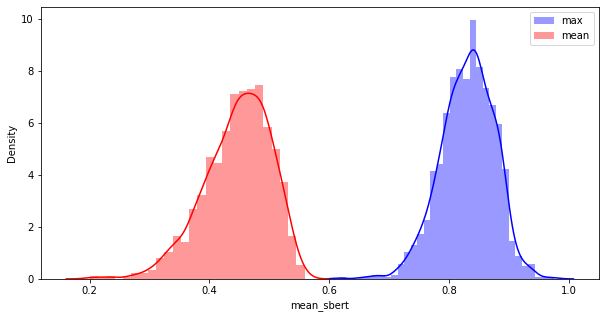

In [239]:
sns.distplot(df_labels['max_sbert'],color='blue',label='max')
sns.distplot(df_labels['mean_sbert'],color='red',label='mean')
plt.legend()
plt.show()

In [240]:
df_labels.sort_values('max_sbert')

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
700,1,1,1,0.616939,0.221632,0.260000,0.019093,0.538462,0.131482,"[0.916951, 9.43888]",0.916951,1.990155e-04
1007,2,2,1,0.652986,0.200739,0.090909,0.013806,0.583333,0.143142,"[8.632537, 2.44701]",2.447010,2.054785e-03
479,2,2,1,0.664795,0.317005,0.160643,0.014404,0.619048,0.164065,"[14.974104, 7.20271]",7.202710,4.214474e-04
825,1,1,1,0.673522,0.340085,0.117550,0.014088,0.485714,0.103230,"[5.34323, -9.25366]",5.343230,9.999995e-01
1072,2,1,0,0.681998,0.338925,0.045161,0.008999,0.541667,0.127286,"[2.393364, 0.578966]",0.578966,1.401074e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1,2,0,0.940131,0.460562,0.625000,0.029053,1.000000,0.207102,"[10.186094, 2.24186]",10.186094,9.996454e-01
663,2,1,0,0.940938,0.343805,0.119342,0.007015,0.478261,0.138502,"[15.282941, -12.02777]",-12.027770,1.377555e-12
281,1,1,1,0.948023,0.454215,0.204724,0.019283,0.894737,0.187469,"[9.820605, -4.071056]",9.820605,9.999991e-01
323,2,2,1,0.964846,0.389894,0.264463,0.018086,0.894737,0.134741,"[0.99324924, 5.4401603]",5.440160,9.884209e-01


c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


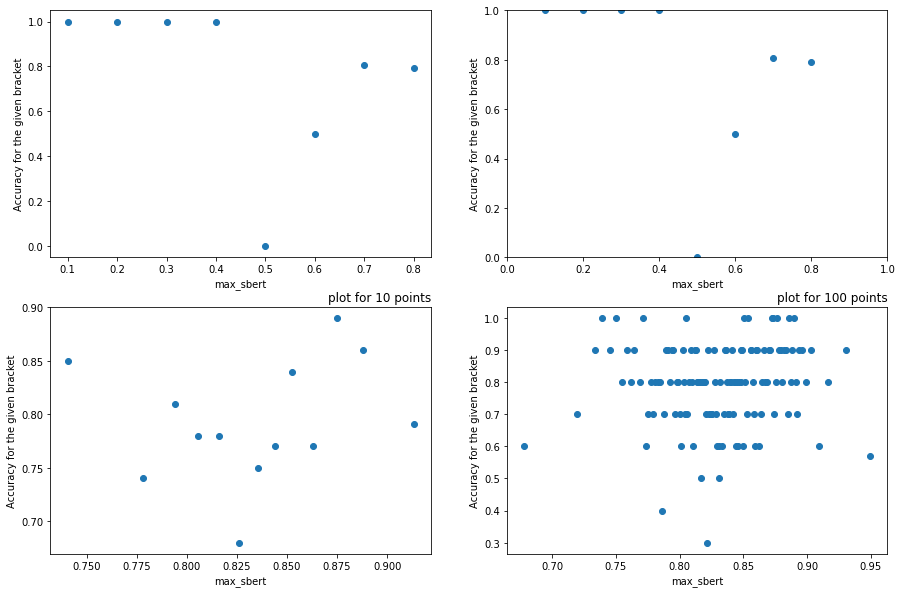

In [241]:
plot_results_max('max_sbert')

In [242]:
df_labels.sort_values('max_sbert')['max_sbert']

700     0.616939
1007    0.652986
479     0.664795
825     0.673522
1072    0.681998
          ...   
1097    0.940131
663     0.940938
281     0.948023
323     0.964846
715     0.975880
Name: max_sbert, Length: 1267, dtype: float64

<Figure size 360x360 with 0 Axes>

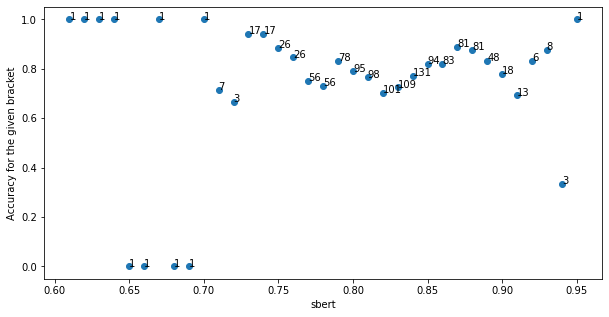

In [243]:
df_sorted = list(df_labels.sort_values('max_sbert')['max_sbert'])
df_sorted_identical = list(df_labels.sort_values('max_sbert')['is_identical'])
dcount = 0.01
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'sbert')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))

c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


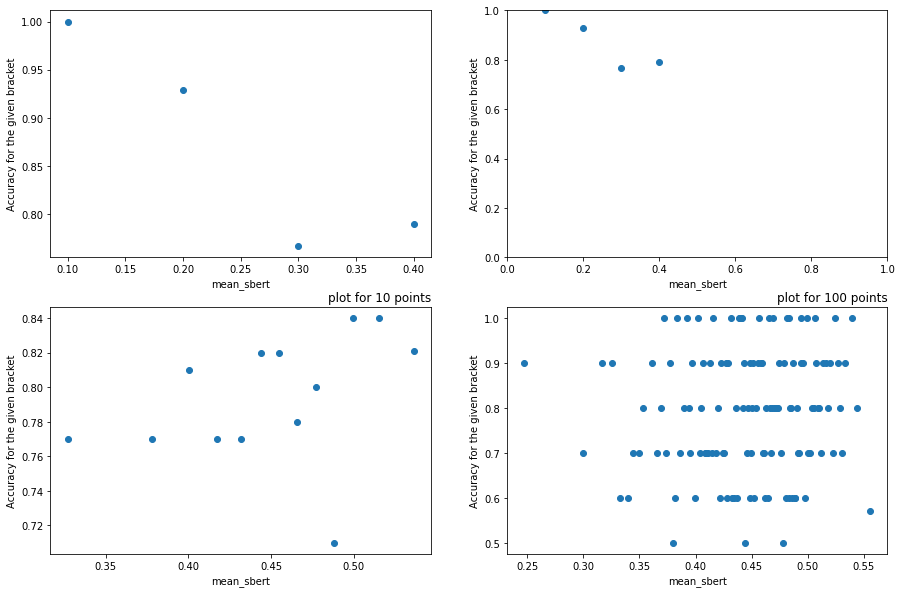

In [244]:
plot_results_max('mean_sbert')

### Ordonnation sur le test - postag

In [245]:
df_labels['max_postag'] = list(matrice_syntax_postag.max())
df_labels['mean_postag'] = list(matrice_syntax_postag.mean())

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


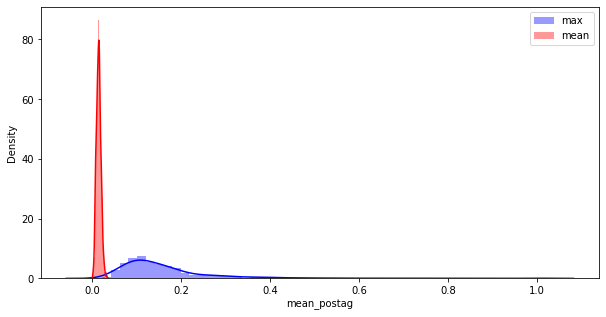

In [246]:
sns.distplot(df_labels['max_postag'],color='blue',label='max')
sns.distplot(df_labels['mean_postag'],color='red',label='mean')
plt.legend()
plt.show()

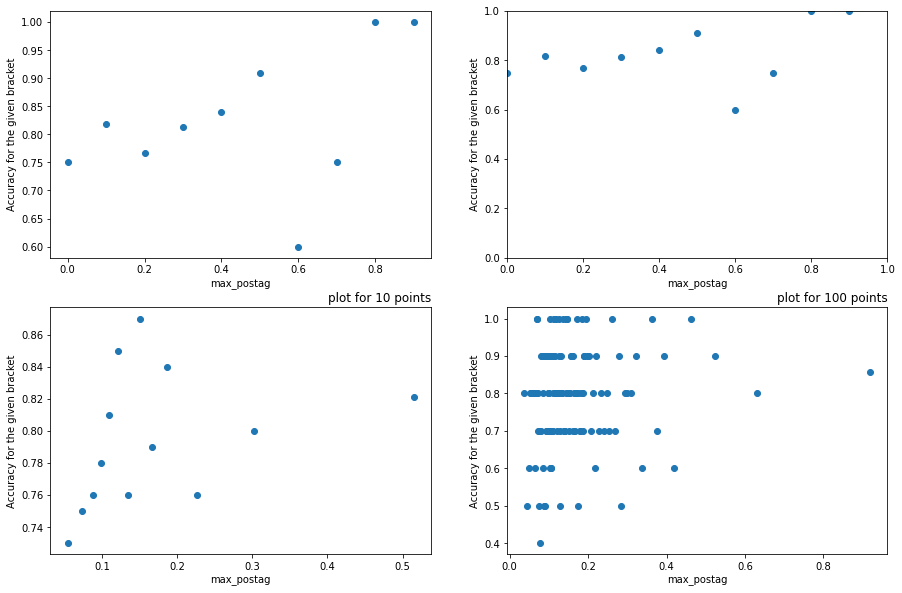

In [247]:
plot_results_max('max_postag')

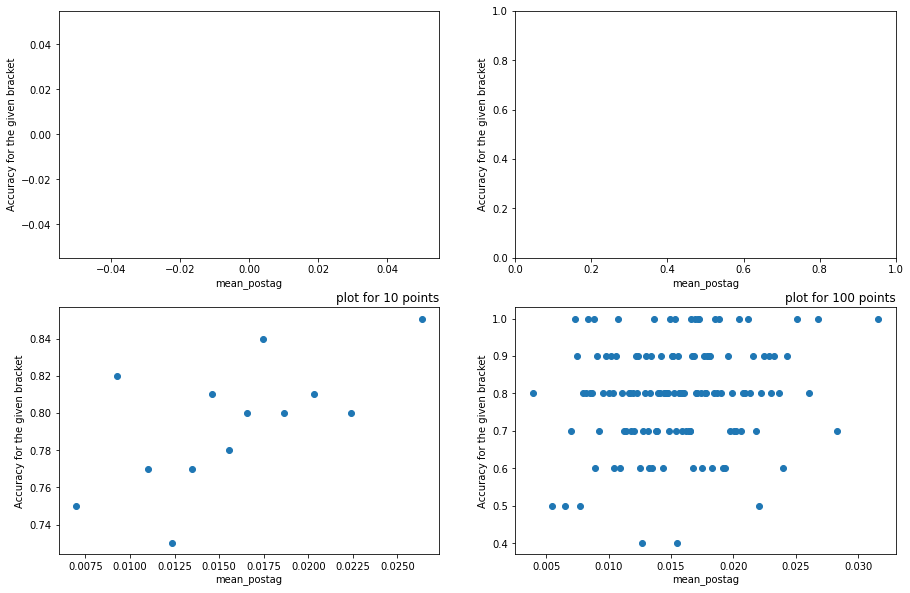

In [248]:
plot_results_max('mean_postag')

<Figure size 360x360 with 0 Axes>

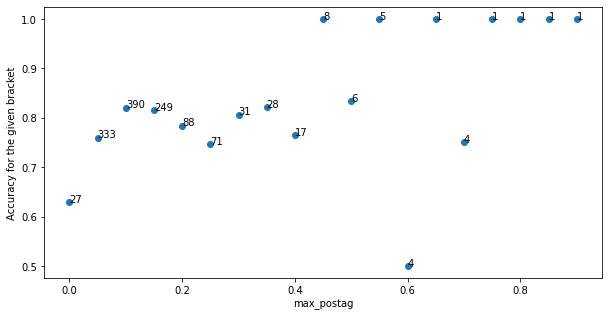

In [249]:
df_sorted = list(df_labels.sort_values('max_postag')['max_postag'])
df_sorted_identical = list(df_labels.sort_values('max_postag')['is_identical'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'max_postag')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))

### Ordonnation sur le test - tree

In [250]:
df_labels['max_tree'] = list(matrice_syntax_tree.max())
df_labels['mean_tree'] = list(matrice_syntax_tree.mean())

c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


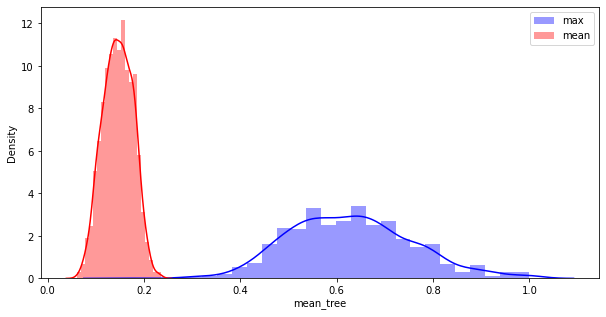

In [251]:
sns.distplot(df_labels['max_tree'],color='blue',label='max')
sns.distplot(df_labels['mean_tree'],color='red',label='mean')
plt.legend()
plt.show()

c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\marti\work\lattice-internship\venv\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


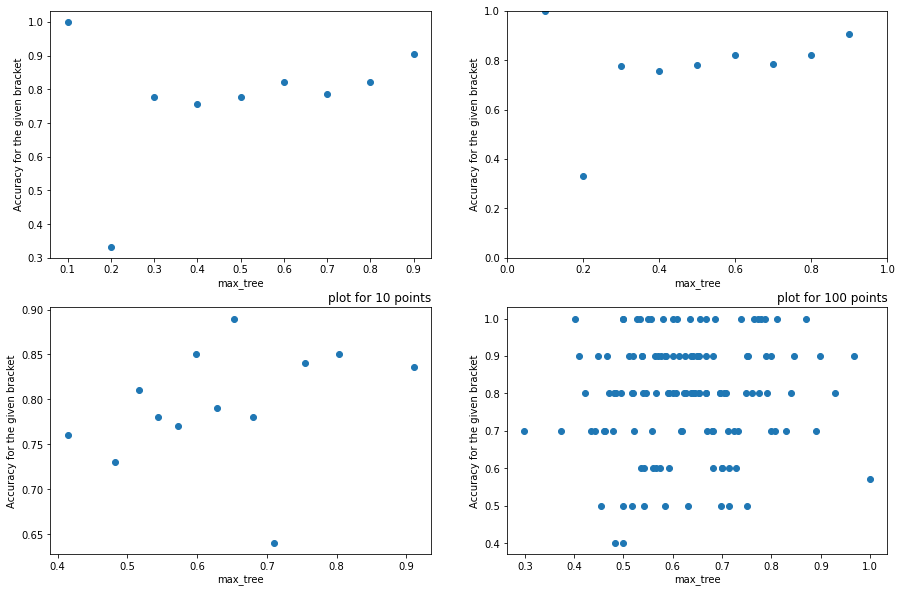

In [252]:
plot_results_max('max_tree')

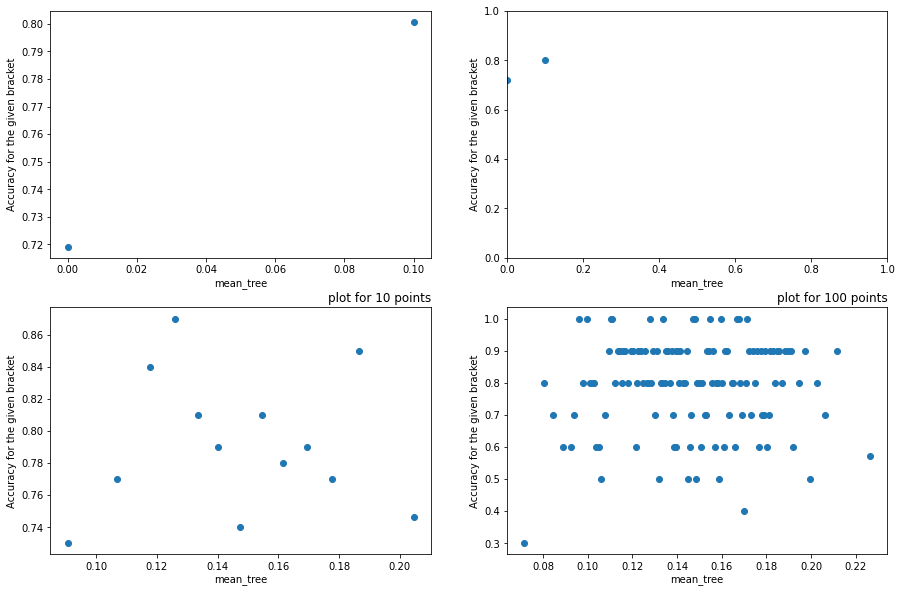

In [253]:
plot_results_max('mean_tree')

<Figure size 360x360 with 0 Axes>

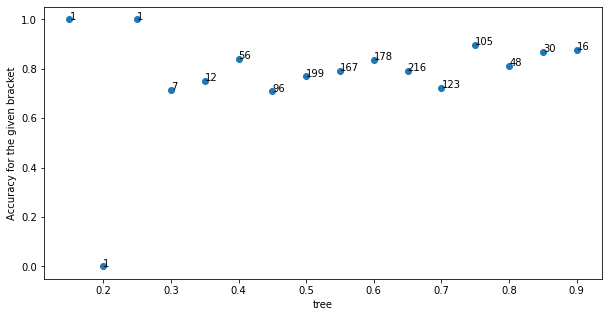

In [254]:
df_sorted = list(df_labels.sort_values('max_tree')['max_tree'])
df_sorted_identical = list(df_labels.sort_values('max_tree')['is_identical'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_identical[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'tree')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))

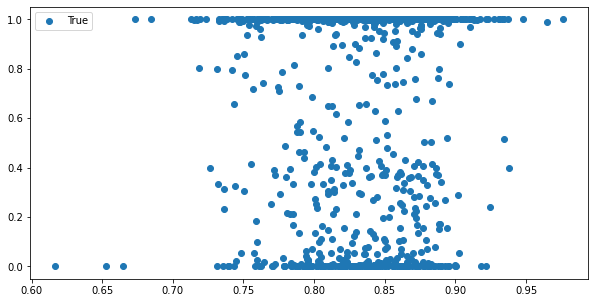

In [255]:
plt.scatter(df_labels[df_labels['is_identical']==1]['max_sbert'],
            df_labels[df_labels['is_identical']==1]['proba'],label='True')
#plt.scatter(df_labels[df_labels['is_identical']==0]['max_sbert'],
#            df_labels[df_labels['is_identical']==0]['proba'],label='False')
plt.legend()

Text(0, 0.5, 'sbert')

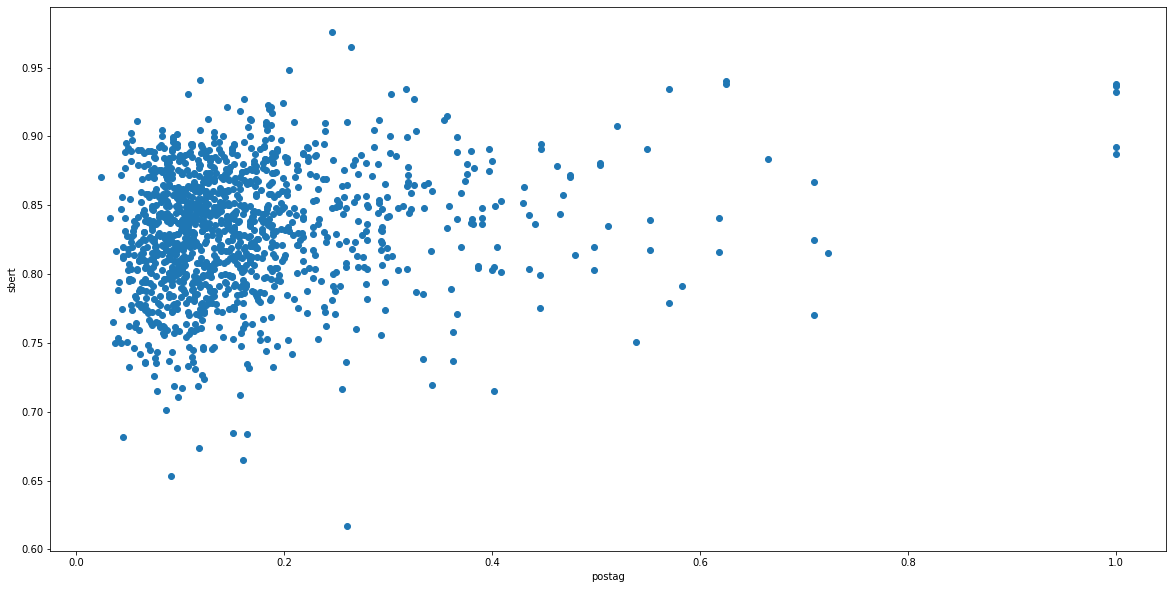

In [256]:
plt.figure(figsize=(20,10))
plt.scatter(df_labels['max_postag'],df_labels['max_sbert'])
plt.xlabel('postag')
plt.ylabel('sbert')
#checker en centrant + réduisant

In [257]:
df_to_compare = pd.DataFrame(np.transpose([list(df_labels['max_postag']),
                              list(df_labels['max_sbert']),
                              list(df_labels['max_tree'])]),
                             columns=['max_postag','max_sbert','max_tree'])
df_to_compare = (df_to_compare-df_to_compare.mean())/df_to_compare.std()

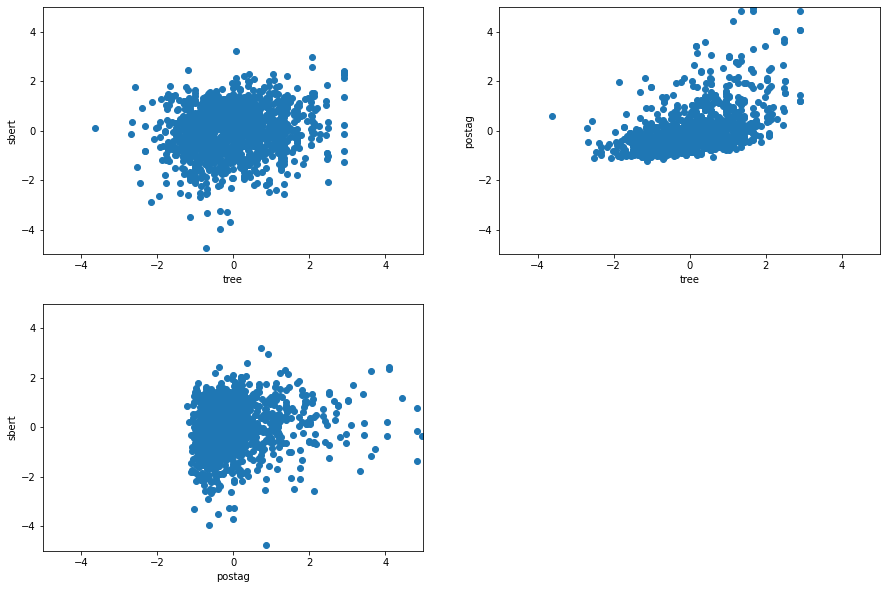

In [258]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('tree')
plt.ylabel('sbert')
plt.scatter(df_to_compare['max_tree'],df_to_compare['max_sbert'])
plt.subplot(2,2,2)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('tree')
plt.ylabel('postag')
plt.scatter(df_to_compare['max_tree'],df_to_compare['max_postag'])
plt.subplot(2,2,3)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('postag')
plt.ylabel('sbert')
plt.scatter(df_to_compare['max_postag'],df_to_compare['max_sbert'])

In [259]:

df_labels[df_labels['is_identical']==1].sort_values('max_sbert')

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
700,1,1,1,0.616939,0.221632,0.260000,0.019093,0.538462,0.131482,"[0.916951, 9.43888]",0.916951,0.000199
1007,2,2,1,0.652986,0.200739,0.090909,0.013806,0.583333,0.143142,"[8.632537, 2.44701]",2.447010,0.002055
479,2,2,1,0.664795,0.317005,0.160643,0.014404,0.619048,0.164065,"[14.974104, 7.20271]",7.202710,0.000421
825,1,1,1,0.673522,0.340085,0.117550,0.014088,0.485714,0.103230,"[5.34323, -9.25366]",5.343230,1.000000
1240,1,1,1,0.684273,0.346010,0.151007,0.013885,0.583333,0.126629,"[15.421611, -11.94648]",15.421611,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
394,1,1,1,0.936929,0.488205,1.000000,0.016640,1.000000,0.134084,"[15.710869, -15.17783]",15.710869,1.000000
1251,2,2,1,0.938100,0.430067,1.000000,0.033709,1.000000,0.127644,"[16.053066, 15.634377]",15.634377,0.396831
281,1,1,1,0.948023,0.454215,0.204724,0.019283,0.894737,0.187469,"[9.820605, -4.071056]",9.820605,0.999999
323,2,2,1,0.964846,0.389894,0.264463,0.018086,0.894737,0.134741,"[0.99324924, 5.4401603]",5.440160,0.988421


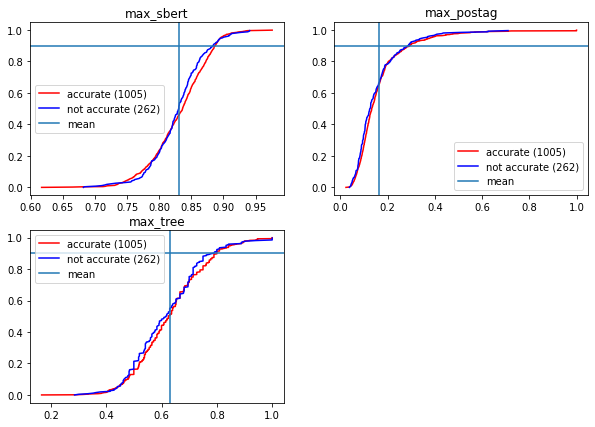

In [260]:
plt.figure(figsize=(10,7))
for met,count in [['max_sbert',1],['max_postag',2],['max_tree',3]]:
    plt.subplot(2,2,count)
    plt.title(f'{met}')
    list_isid = list(df_labels[df_labels['is_identical']==1].sort_values(met)[met])
    plt.plot(list_isid,[i/len(list_isid) for i in range(len(list_isid))],label=f'accurate ({len(list_isid)})',color='red')
    list_isid = list(df_labels[df_labels['is_identical']==0].sort_values(met)[met])
    plt.plot(list_isid,[i/len(list_isid) for i in range(len(list_isid))],label=f'not accurate ({len(list_isid)})', color = 'blue')
    plt.axvline(df_labels[met].mean(),label='mean')
    plt.axhline(0.9)
    plt.legend()

Text(0.5, 0.5, 'tree')

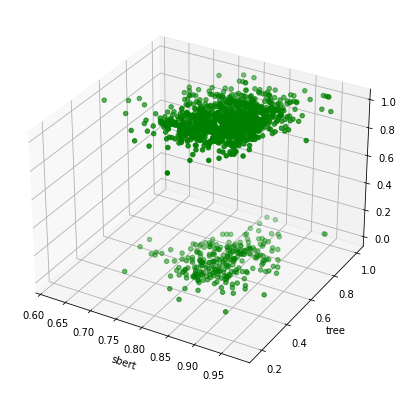

In [261]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_labels['max_sbert'], df_labels['max_tree'], df_labels['is_identical'], color = "green")
plt.xlabel('sbert')
plt.ylabel('tree')

In [262]:
df_labels

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286,0.000019
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825,0.999908
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370,0.997712
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060,1.000000
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006,"[15.594703, -15.99087]",15.594703,1.000000
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891,"[5.797847, -5.010811]",5.797847,0.999980
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028,"[11.551912, 6.754648]",11.551912,0.991815
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378,"[-6.587974, -12.45122]",-6.587974,0.997166


## Considération proba

In [263]:
with open("predictions/predictions_test.lst") as f:
    lineList_dev = f.readlines()
test_labels_proba = [int(element.replace('\n', '')) for element in lineList_dev]

In [264]:
def change_form(x):
    return [float(i) for i in x[2:-2].split()]

In [265]:
a = pd.read_csv('predictions/predictions_test_proba.csv',sep=';',header=None)
a[1] = a[1].apply(change_form)

In [266]:
list(a[1])

[[5.0213194, -5.833286],
 [2.3608248, -6.932063],
 [9.429515, 15.50737],
 [15.58206, -14.36882],
 [12.558033, -11.74112],
 [3.7612534, -7.294478],
 [15.175407, -15.85599],
 [16.1576, 15.6213],
 [9.314343, 15.65802],
 [16.155457, 14.42147],
 [15.738669, -16.03894],
 [15.688032, 0.5589723],
 [0.7525398, 2.617728],
 [4.50124, 3.857397],
 [0.7362056, 0.0730418],
 [15.32024, -16.06172],
 [10.354734, -12.18055],
 [1.1095705, 8.264791],
 [15.355788, -13.31441],
 [4.292856, 12.20794],
 [15.959261, 15.13469],
 [16.210812, 15.648643],
 [0.0517354, 0.8666346],
 [8.939929, -15.61609],
 [13.311732, 14.32829],
 [15.089451, -10.9625],
 [-0.14655687, -12.740235],
 [14.196496, -16.0036],
 [15.561975, -15.49946],
 [13.640885, -13.16303],
 [3.707168, 8.46864],
 [11.009879, -13.36305],
 [0.9771459, 14.540905],
 [0.40672, 4.483405],
 [7.948249, -0.6830585],
 [6.5850883, 8.289247],
 [14.48903, -15.88672],
 [15.438654, -15.65349],
 [15.830217, 7.920686],
 [16.011187, 12.68608],
 [15.627978, -15.84635],
 [3.2

In [267]:
df_labels['both_probas'] = list(a[1])

In [268]:
df_labels

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286,0.000019
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825,0.999908
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370,0.997712
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060,1.000000
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006,"[15.594703, -15.99087]",15.594703,1.000000
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891,"[5.797847, -5.010811]",5.797847,0.999980
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028,"[11.551912, 6.754648]",11.551912,0.991815
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378,"[-6.587974, -12.45122]",-6.587974,0.997166


In [269]:
def proba_for_good(true,list_prob):
    return list_prob[true-1]

In [270]:
df_labels['right_proba'] = df_labels.apply(lambda x: proba_for_good(x.true_labels, x.both_probas), axis=1)

In [271]:
df_labels

,true_labels,test_labels,is_identical,max_sbert,mean_sbert,max_postag,mean_postag,max_tree,mean_tree,both_probas,right_proba,proba
0,2,1,0,0.886177,0.452219,0.230769,0.011784,0.777778,0.139553,"[5.0213194, -5.833286]",-5.833286,0.000019
1,1,1,1,0.871552,0.466545,0.230769,0.015038,0.777778,0.139553,"[2.3608248, -6.932063]",2.360825,0.999908
2,2,2,1,0.818636,0.507991,0.149051,0.010764,0.461538,0.117724,"[9.429515, 15.50737]",15.507370,0.997712
3,1,1,1,0.904500,0.441542,0.286432,0.029332,0.652174,0.150080,"[15.58206, -14.36882]",15.582060,1.000000
4,1,1,1,0.853596,0.429754,0.082353,0.007494,0.541667,0.151310,"[12.558033, -11.74112]",12.558033,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1,1,1,0.820505,0.486912,0.117816,0.017778,0.535714,0.150006,"[15.594703, -15.99087]",15.594703,1.000000
1263,1,1,1,0.814636,0.382487,0.095588,0.017919,0.592593,0.122891,"[5.797847, -5.010811]",5.797847,0.999980
1264,1,2,0,0.844037,0.405598,0.081776,0.011029,0.642857,0.187028,"[11.551912, 6.754648]",11.551912,0.991815
1265,1,1,1,0.840069,0.484510,0.366534,0.026824,0.640000,0.139378,"[-6.587974, -12.45122]",-6.587974,0.997166


c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marti\work\lattice-internship\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


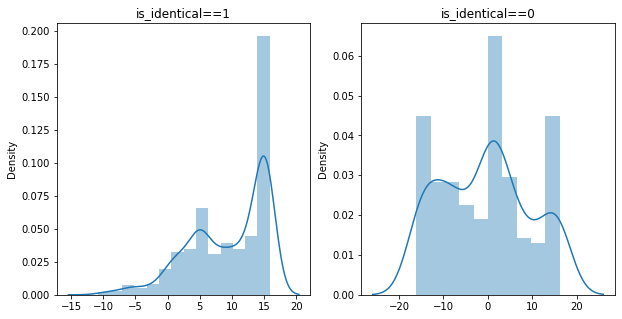

In [272]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(list(df_labels[df_labels['is_identical']==1]['right_proba']),bins='auto')
plt.title('is_identical==1')
plt.subplot(1,2,2)
sns.distplot(list(df_labels[df_labels['is_identical']==0]['right_proba']),bins='auto')
plt.title('is_identical==0')
plt.show()

<Figure size 360x360 with 0 Axes>

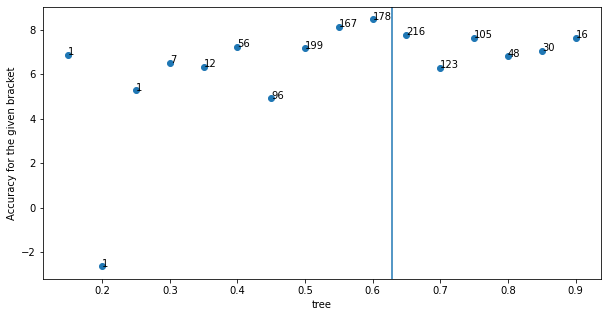

In [273]:
df_sorted = list(df_labels.sort_values('max_tree')['max_tree'])
df_sorted_prob = list(df_labels.sort_values('max_tree')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'tree')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_tree'])),label='mean')

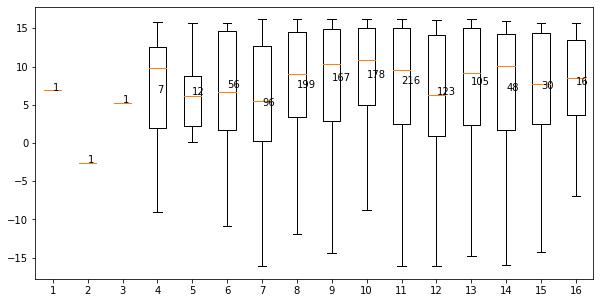

In [274]:
df_sorted = list(df_labels.sort_values('max_tree')['max_tree'])
df_sorted_prob = list(df_labels.sort_values('max_tree')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,10)
ax.boxplot([df_sorted_prob[l[i]:l[i+1]] for i in range(len(l)-1)],
           showfliers=False)
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (range(1,20)[i], np.mean(list(df_sorted_prob[l[i]:l[i+1]]))))

<Figure size 360x360 with 0 Axes>

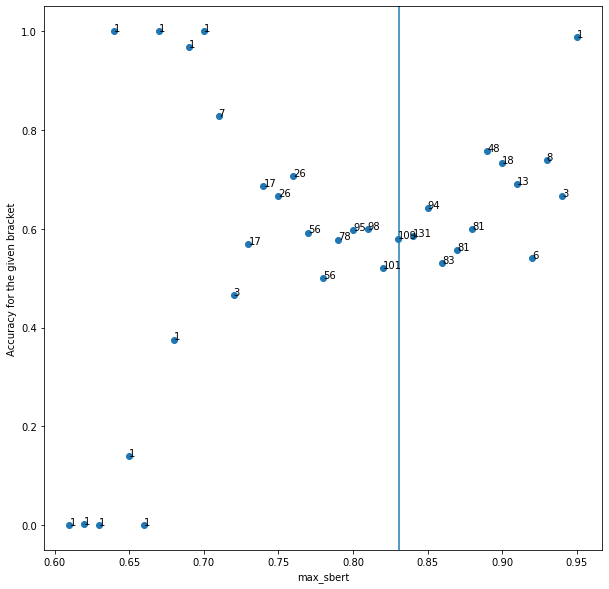

In [275]:
df_sorted = list(df_labels.sort_values('max_sbert')['max_sbert'])
df_sorted_prob = list(df_labels.sort_values('max_sbert')['proba'])
dcount = 0.01
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'max_sbert')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_sbert'])),label='mean')

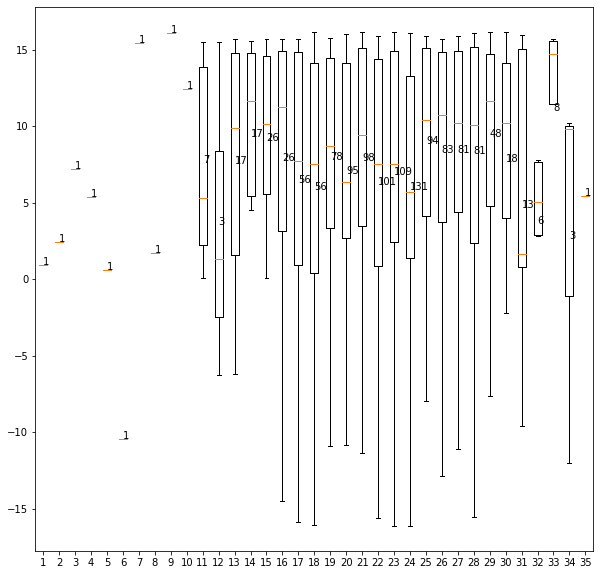

In [276]:
df_sorted = list(df_labels.sort_values('max_sbert')['max_sbert'])
df_sorted_prob = list(df_labels.sort_values('max_sbert')['right_proba'])
dcount = 0.01
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,20)
ax.boxplot([df_sorted_prob[l[i]:l[i+1]] for i in range(len(l)-1)],
           showfliers=False)
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (range(1,100)[i], np.mean(list(df_sorted_prob[l[i]:l[i+1]]))))

<Figure size 360x360 with 0 Axes>

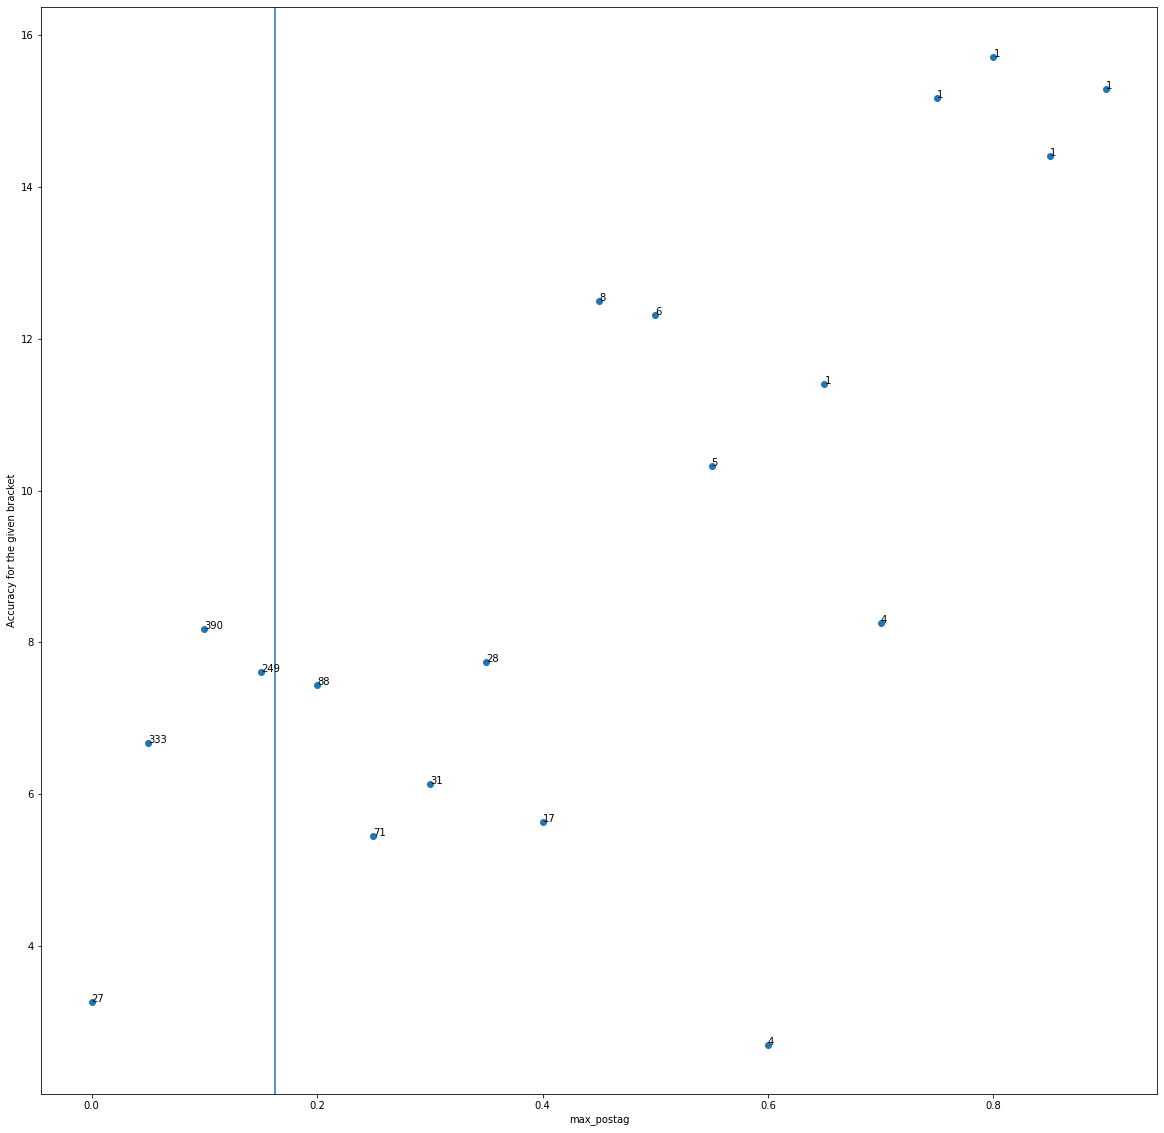

In [277]:
df_sorted = list(df_labels.sort_values('max_postag')['max_postag'])
df_sorted_prob = list(df_labels.sort_values('max_postag')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'max_postag')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (x[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_postag'])),label='mean')

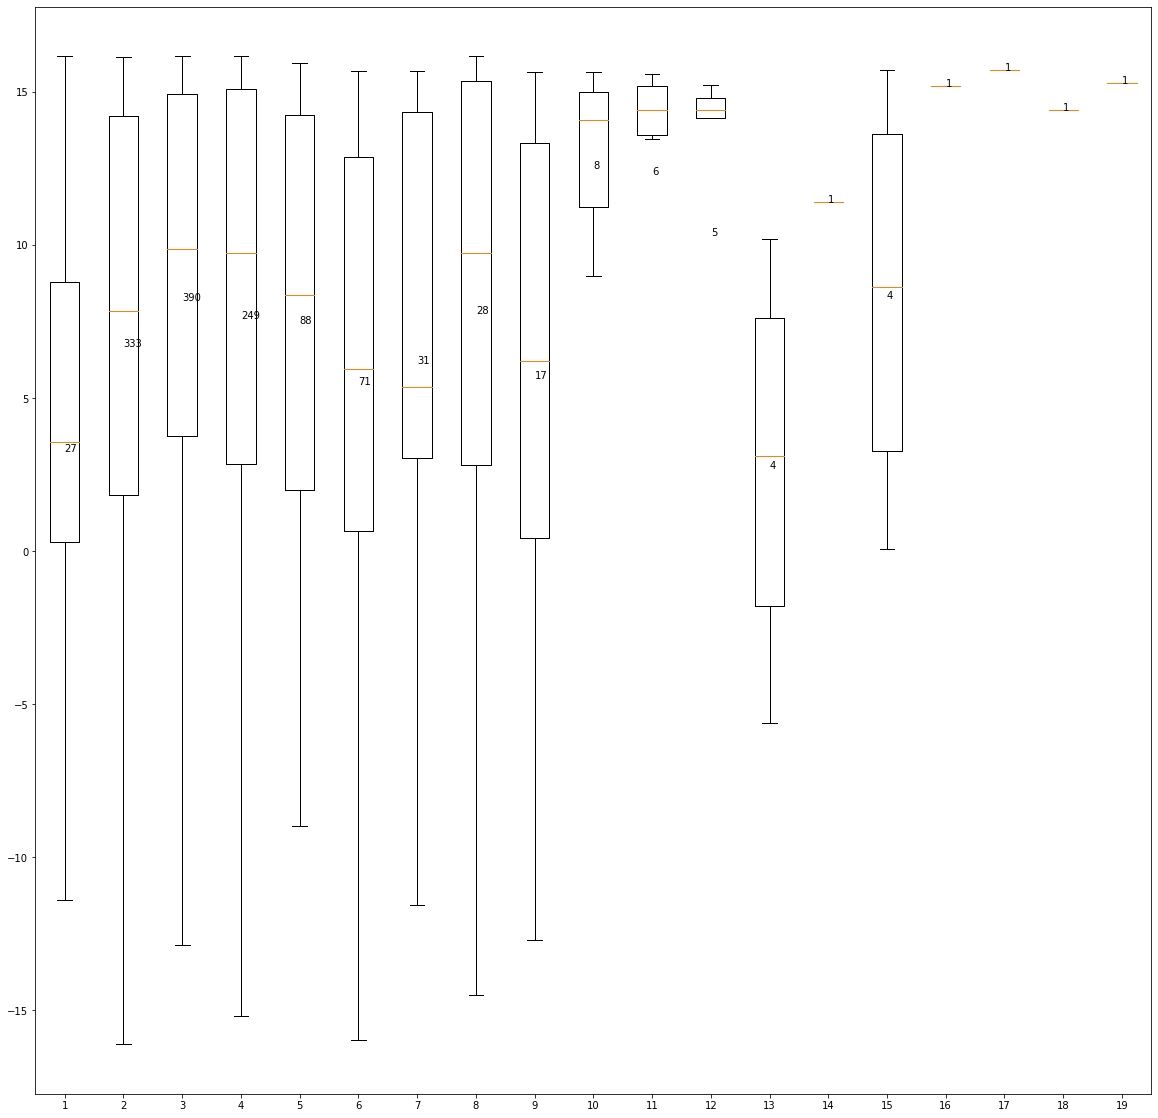

In [278]:
df_sorted = list(df_labels.sort_values('max_postag')['max_postag'])
df_sorted_prob = list(df_labels.sort_values('max_postag')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+1]]) for i in range(len(l)-1)]
occ_per_range.pop(0)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (30,6)
ax.boxplot([df_sorted_prob[l[i]:l[i+1]] for i in range(len(l)-1)],
           showfliers=False)
for i, txt in enumerate(occ_per_range):
    ax.annotate(txt, (range(1,20)[i], np.mean(list(df_sorted_prob[l[i]:l[i+1]]))))

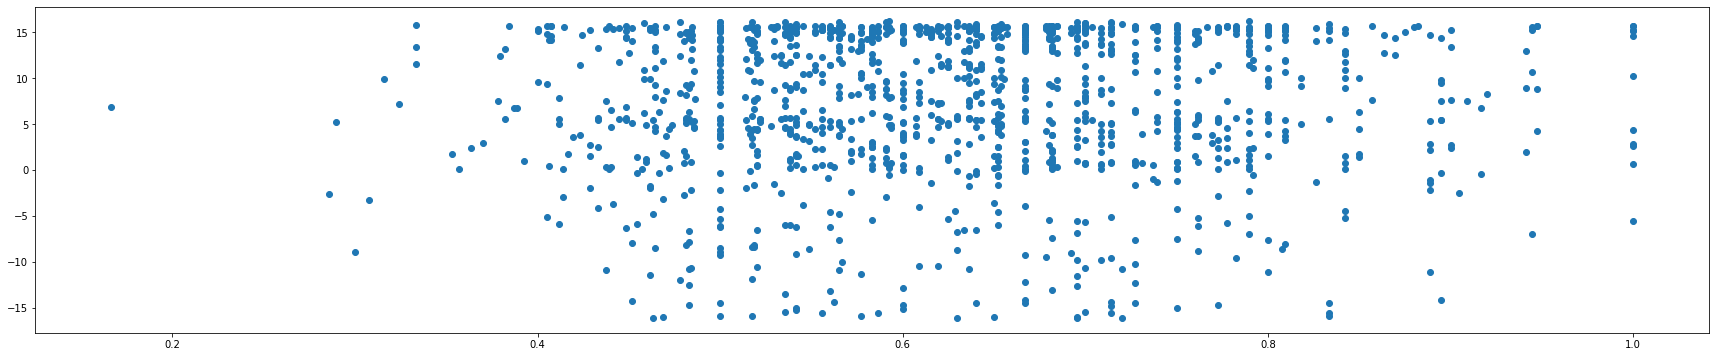

In [279]:
plt.scatter(list(df_labels.sort_values('max_tree')['max_tree']),
            list(df_labels.sort_values('max_tree')['right_proba']))

<Figure size 720x720 with 0 Axes>

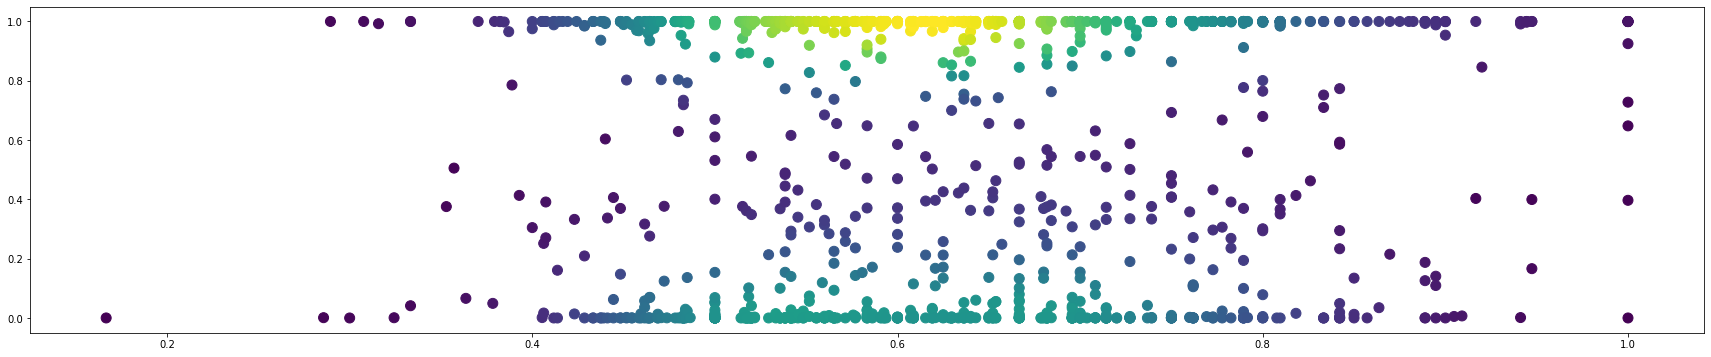

In [280]:
from scipy.stats import gaussian_kde
x,y = list(df_labels.sort_values('max_tree')['max_tree']),list(df_labels.sort_values('max_tree')['proba'])
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

In [281]:
df_labels[df_labels['is_identical']==1].corr(method='spearman')['proba']

true_labels    -0.715891
test_labels    -0.715891
is_identical         NaN
max_sbert       0.045709
mean_sbert     -0.024459
max_postag      0.056522
mean_postag     0.049766
max_tree        0.033117
mean_tree       0.002915
right_proba     0.465337
proba           1.000000
Name: proba, dtype: float64

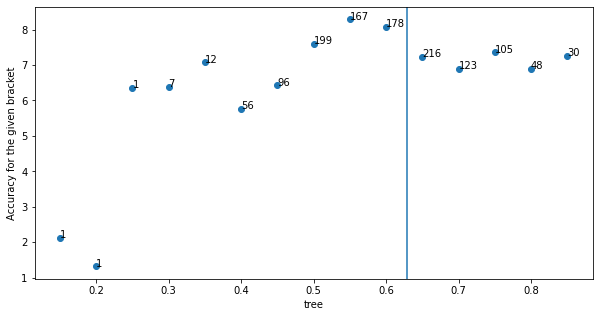

In [282]:
df_sorted = list(df_labels.sort_values('max_tree')['max_tree'])
df_sorted_prob = list(df_labels.sort_values('max_tree')['right_proba'])
dcount = 0.05
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+2]]) for i in range(len(l)-2)]

occ_per_range.pop(0)
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
x = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range)
plt.xlabel(f'tree')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range[:-1]):
    ax.annotate(txt, (x[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_tree'])),label='mean')

0.04298557281494142
0.044795160293579106
0.04352211475372314
0.041997537612915026
0.03347179889678953
0.02427312374114987
0.031176702976226767
0.03090930700302119
0.022509095668792667
0.014948177337646418
0.013573327064514085
0.011047153472900306
0.011655945777892973
0.010060439109802144
0.010977864265441784
0.010064830780029177
0.01055316209793078
0.01003405570983873
0.010299167633056494
0.010214698314666593
0.010104718208312824
0.010150604248046702
0.010067625045776185
0.0100504493713377
0.010028386116027632
0.010106697082519323
0.010017518997192165
0.010405893325805438
0.010039553642272714
0.010262346267699951
0.011319723129272097
0.010475890636443719
0.01013082981109592
0.024846253395080287
0.025880324840545366


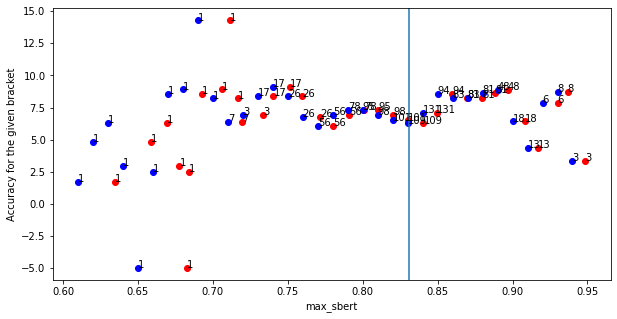

In [283]:
df_sorted = list(df_labels.sort_values('max_sbert')['max_sbert'])
df_sorted_prob = list(df_labels.sort_values('max_sbert')['right_proba'])
dcount = 0.01
count = int(df_sorted[0]/dcount)*dcount
l = [0]
occ_per_range = [0]
for i in range(len(df_sorted)):
    #print(df_sorted_max_sbert[i])
    if count+dcount<=df_sorted[i]:
        print(df_sorted[i]-count)
        occ_per_range.append(i-l[-1])
        count+=dcount
        l.append(i)
            #print('yes')

list_scores_range = [np.mean(df_sorted_prob[l[i]:l[i+2]]) for i in range(len(l)-2)]

occ_per_range.pop(0)
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots()
x=[np.mean(df_sorted[l[i]:l[i+2]]) for i in range(len(l)-2)]
x2 = [int(df_sorted[0]/dcount)*dcount + dcount * i for i in range(len(list_scores_range))]
ax.scatter(x,list_scores_range,color='red')
ax.scatter(x2,list_scores_range,color='blue')
plt.xlabel(f'max_sbert')
plt.ylabel('Accuracy for the given bracket')
for i, txt in enumerate(occ_per_range[:-1]):
    ax.annotate(txt, (x[i], list_scores_range[i]))
    ax.annotate(txt, (x2[i], list_scores_range[i]))
plt.axvline(np.mean(list(df_labels['max_sbert'])),label='mean')

In [284]:
df = df_labels.sort_values('max_sbert')
l=[(i/100 ,len(df[df['max_sbert']>=i/100])/len(df) , list(df[df['max_sbert']>=i/100].mean()[['proba','is_identical']])) for i in range(60,100,1)]
l=[(a,b,c,d) for a,b,(c,d) in l]

C:\Users\marti\AppData\Local\Temp\ipykernel_2796\1221614547.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df['max_sbert']>=i/100])/len(df) , list(df[df['max_sbert']>=i/100].mean()[['proba','is_identical']])) for i in range(60,100,1)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\1221614547.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df['max_sbert']>=i/100])/len(df) , list(df[df['max_sbert']>=i/100].mean()[['proba','is_identical']])) for i in range(60,100,1)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\1221614547.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'num

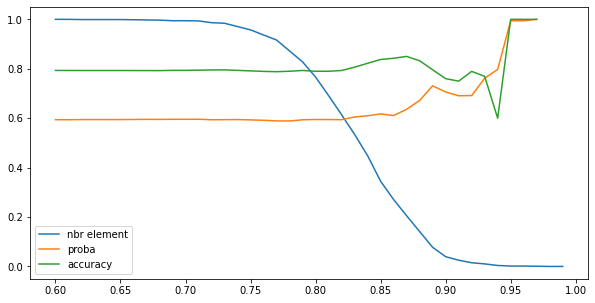

In [285]:
l = np.transpose(l)
plt.plot(l[0],l[1],label='nbr element')
plt.plot(l[0],l[2],label='proba')
plt.plot(l[0],l[3],label='accuracy')
plt.legend()

C:\Users\marti\AppData\Local\Temp\ipykernel_2796\342686857.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df[metrique]>=i/100])/len(df) , list(df[df[metrique]>=i/100].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\342686857.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df[metrique]>=i/100])/len(df) , list(df[df[metrique]>=i/100].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\342686857.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'nume

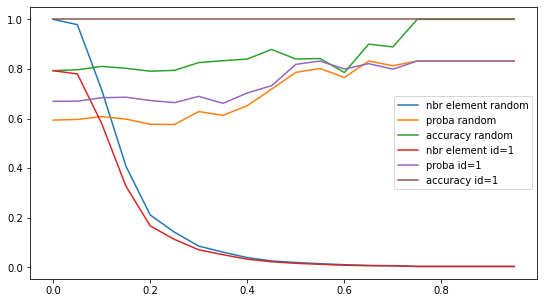

In [286]:
metrique = 'max_postag'
depart = 0
step = 5
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
df = df_labels.sort_values(metrique)
l=[(i/100 ,len(df[df[metrique]>=i/100])/len(df) , list(df[df[metrique]>=i/100].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
l=[(a,b,c,d) for a,b,(c,d) in l]
l = np.transpose(l)
plt.plot(l[0],l[1],label='nbr element random')
plt.plot(l[0],l[2],label='proba random')
plt.plot(l[0],l[3],label='accuracy random')
plt.legend()
plt.subplot(1,2,2)
df = df_labels.sort_values(metrique)
l=[(i/100 ,len(df[df[metrique]>=i/100][df['is_identical']==1])/len(df) , list(df[df[metrique]>=i/100][df['is_identical']==1].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
l=[(a,b,c,d) for a,b,(c,d) in l]
l = np.transpose(l)
plt.plot(l[0],l[1],label='nbr element id=1')
plt.plot(l[0],l[2],label='proba id=1')
plt.plot(l[0],l[3],label='accuracy id=1')
plt.legend()

C:\Users\marti\AppData\Local\Temp\ipykernel_2796\3045442204.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df[metrique]>=i/100])/len(df) , list(df[df[metrique]>=i/100].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\3045442204.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df[metrique]>=i/100])/len(df) , list(df[df[metrique]>=i/100].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\3045442204.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'n

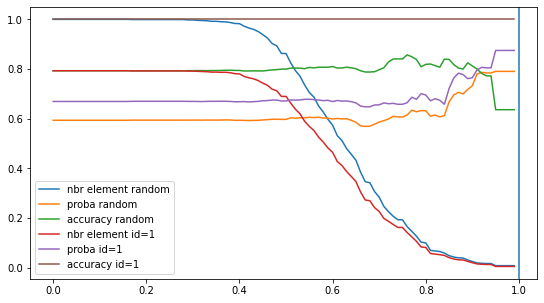

In [287]:
metrique = 'max_tree'
depart = 00
step = 1
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
df = df_labels.sort_values(metrique)
l=[(i/100 ,len(df[df[metrique]>=i/100])/len(df) , list(df[df[metrique]>=i/100].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
l=[(a,b,c,d) for a,b,(c,d) in l]
l = np.transpose(l)
plt.plot(l[0],l[1],label='nbr element random')
plt.plot(l[0],l[2],label='proba random')
plt.plot(l[0],l[3],label='accuracy random')
plt.legend()
plt.subplot(1,2,2)
df = df_labels.sort_values(metrique)
l=[(i/100 ,len(df[df[metrique]>=i/100][df['is_identical']==1])/len(df) , list(df[df[metrique]>=i/100][df['is_identical']==1].mean()[['proba','is_identical']])) for i in range(depart,100,step)]
l=[(a,b,c,d) for a,b,(c,d) in l]
l = np.transpose(l)
plt.plot(l[0],l[1],label='nbr element id=1')
plt.plot(l[0],l[2],label='proba id=1')
plt.plot(l[0],l[3],label='accuracy id=1')
plt.axvline(df_labels.max()['max_tree'])
plt.legend()

C:\Users\marti\AppData\Local\Temp\ipykernel_2796\1411581842.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df['max_sbert']>=i/100])/len(df) , list(df[df['max_sbert']>=i/100].mean()[['proba','is_identical']])) for i in range(60,100,1)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\1411581842.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  l=[(i/100 ,len(df[df['max_sbert']>=i/100])/len(df) , list(df[df['max_sbert']>=i/100].mean()[['proba','is_identical']])) for i in range(60,100,1)]
C:\Users\marti\AppData\Local\Temp\ipykernel_2796\1411581842.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'num

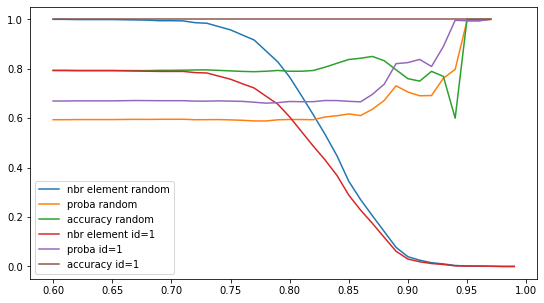

In [288]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
df = df_labels.sort_values('max_sbert')
l=[(i/100 ,len(df[df['max_sbert']>=i/100])/len(df) , list(df[df['max_sbert']>=i/100].mean()[['proba','is_identical']])) for i in range(60,100,1)]
l=[(a,b,c,d) for a,b,(c,d) in l]
l = np.transpose(l)
plt.plot(l[0],l[1],label='nbr element random')
plt.plot(l[0],l[2],label='proba random')
plt.plot(l[0],l[3],label='accuracy random')
plt.legend()
plt.subplot(1,2,2)
df = df_labels.sort_values('max_sbert')
l=[(i/100 ,len(df[df['max_sbert']>=i/100][df['is_identical']==1])/len(df) , list(df[df['max_sbert']>=i/100][df['is_identical']==1].mean()[['proba','is_identical']])) for i in range(60,100,1)]
l=[(a,b,c,d) for a,b,(c,d) in l]
l = np.transpose(l)
plt.plot(l[0],l[1],label='nbr element id=1')
plt.plot(l[0],l[2],label='proba id=1')
plt.plot(l[0],l[3],label='accuracy id=1')
plt.legend()